# Introduction

In this notebook we tried to understand various algorithm to calculated different statistics of given network. This will be helpful when we are doing some behaviour or network measurement. This kind of measurement helps in understanding different structural properties of given network.

In the mining of social median, these statistics are very useful. As we know complex system can be easly represented using graph and social network is one of complex network which is represented as graph. 

The usual question in social media mining are:

  • Who are the central figures (influential individuals) in the network?

  • What interaction patterns are common in friends?

  • Who are the like-minded users and how can we find these similar
  individuals?

  To find these, we need to have some quantifying method. Based on these quantifying procedure, we can answer these questions. The statistics discussed in this notebook will be helpful to quantify those values.

# Problem Statement

Create various statistics of network and store them into pandas using function module

# List of algorithm used in this notebook

In this notebook, netowrkX based library used to find related statistics.
[NetworkX link](https://networkx.org/documentation/stable/tutorial.html)

# List of Libraries used

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# The Data

## Load the Data

### LastFM Asia Social Network
from http://snap.stanford.edu/data/feather-lastfm-social.html

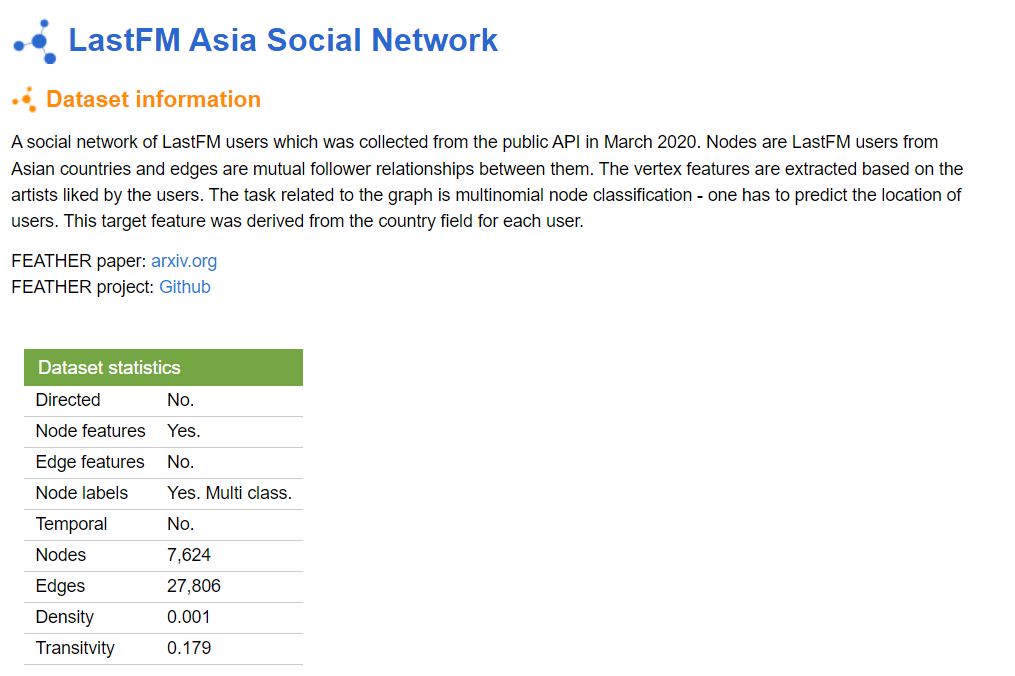

**Load file from Gdrive**

## Load data from FM

--2022-10-04 06:48:38--  http://snap.stanford.edu/data/lastfm_asia.zip
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6527202 (6.2M) [application/zip]
Saving to: ‘lastfm_asia.zip’

lastfm_asia.zip     100%[===================>]   6.22M  1.86MB/s    in 5.1s    

2022-10-04 06:48:43 (1.22 MB/s) - ‘lastfm_asia.zip’ saved [6527202/6527202]

Archive:  lastfm_asia.zip
   creating: lasftm_asia/
  inflating: lasftm_asia/lastfm_asia_edges.csv  
  inflating: lasftm_asia/lastfm_asia_target.csv  
  inflating: lasftm_asia/lastfm_asia_features.json  
  inflating: lasftm_asia/README.txt  


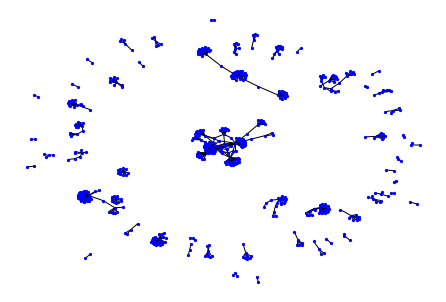

In [2]:
# Import zip from http://snap.stanford.edu/data/lastfm_asia.zip
import zipfile
import pandas as pd
import os
!rm -fr ./lastfm_asia.zip
!rm -fr ./lasftm_asia
#url = 'http://snap.stanford.edu/data/deezer_ego_nets.zip'
!wget http://snap.stanford.edu/data/lastfm_asia.zip
!unzip lastfm_asia.zip
# Only load the edges to generate graph. Because here our intension is study the statistic of this graph
fname = 'lasftm_asia/lastfm_asia_edges.csv'
lastFM = pd.read_csv(fname,
                          na_values='?', comment='\t',
                          sep=',', skipinitialspace=True,header=0)
# Generate Graph from lastFM data
# We are taking slice of lastFM as loading entire graph is taking too much of time.
edgeno= 500 # Size of the Graph to load
lFM_df = lastFM.head(edgeno)
import networkx as nx
G=nx.from_pandas_edgelist(lFM_df, 'node_1', 'node_2')
# Draw graph
pos = nx.spring_layout(G)  # Seed layout for reproducibility
nx.draw(G, pos, node_color="b", node_size=5, with_labels=False)

This is social network graph where many users have close interaction but no interaction with other users as well. so all user is not connected.

# Understand the Graph Data
Graph data can be understood by collectiing various statistics at node level and graph level.


Following measurements are important in social network:

Q1) Who are the central figures (influential individuals) in the network?

This can be measured using Centrality values for each node based on various criterion. Centrality defines how important a node is within a network.

    1.1 Centrality in terms of those who you are connected to
      a) Degree centrality
      b) Eigenvector Centrality
      c) Katz Centrality
      d) PageRank
    1.2 Centrality in terms of how you connect others:
      a) Betweenness Centrality
    1.3 Centrality in terms of how fast you can reach others
      a) Closeness Centrality


Q2) What interaction patterns are common in friends?

This is measured using "Reciprocity and Transitivity" and "Balance and Status"

Q3) Who are the like-minded users and how can we find these similar individuals?

This can be measured using Similarity

## Degree Centrality:


**Paper/Book chapter Name:** Chapter-3

**Paper Number for refrence in this notebook:** [1]

**Year of Publish:** 2014

**Journal/Book name:** Social Media Mining,An Introduction

**Author:** Reza Zafarani,Mohammad Ali Abbasi,Huan Liu

**Paper summary:**

**NODE-LEVEL STATISTICS AND FEATURES**:

In traditional approach, we collect some statistics or feature based on heuristic functions or domain knowledge and then use these features as input to a standard machine learning classifier (e.g., logistic regression). In this we need to look for those statistic which can differentiate the nodes. This differentiation becomes the basis for input to classical machine learning algorithms. Following are useful statistics:

1. *Node degree*: The number of edges incident to a Node. For directed graph we need to calculate incoming and outgoing edges on the Node.  This is often one of the most informative features in traditional machine learning models applied to node-level tasks. We can use degree distribution too to define feature of ML.
2. *Node Centrality*: Who are the central figures (influential individuals) in the network? Centrality defines how important a node is within a network. Importance of node in the graph is not determine by node degree. Node centrality gives more powerful ways measure importance of node which becomes important feature in machine learning. Node centrality can be calculated in various ways as follows:

### Centrality in terms of those who you are connected to:

**Degree centrality**:
Ranks nodes with more connections higher in terms of centrality.In directed graphs, we can either use the in-degree, the out-degree, or the combination as the degree centrality value. in-degree is known as prestige and out-degree know as gregariousness.

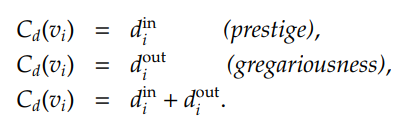

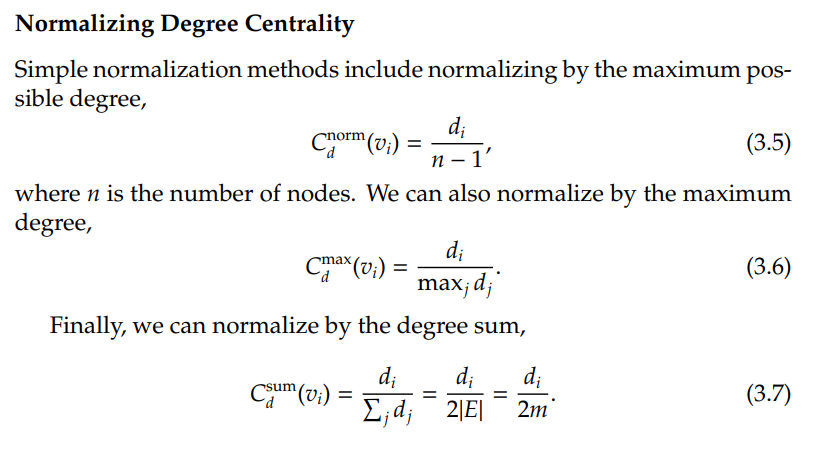

In [3]:
# In the Undirected graph:
# Node degree
deg = nx.degree(G)
G_df = pd.DataFrame.from_dict(deg)
G_df.rename(columns = {0:'Node_label', 1:'Node_deg'}, inplace = True)
# Degree Normalization using max possible degree ( n-1)
max_possible_degree = G.number_of_nodes() -1
G_df['norm_max_possible_deg'] = G_df['Node_deg'].div(max_possible_degree)
# Degree Normalization using max degree
max_degree = G_df['Node_deg'].max()
G_df['norm_max_deg'] = G_df['Node_deg'].div(max_degree)
# Degree Normalization using degree sum
degree_sum = G_df['Node_deg'].sum()
G_df['norm_deg_sum'] = G_df['Node_deg'].div(degree_sum)
G_df.head()
# For directed graph same operation based on in and out degree. Leave it for actual case.

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum
0,0,1,0.001880,0.029412,0.001
1,747,1,0.001880,0.029412,0.001
2,1,10,0.018797,0.294118,0.010
3,4257,1,0.001880,0.029412,0.001
4,2194,1,0.001880,0.029412,0.001


**Eigenvector Centrality**

In degree centrality, we consider nodes with more connections to be more
important. However, in real-world scenarios, having more friends does
not by itself guarantee that someone is important: having more important
friends provides a stronger signal. Before getting into eigenvector centrality, lets understand the eigen vector and its significance.
For any square matrix A we can find there eigen value and eigen vector as shown below

**AX = λX**
where 
A is the square matrix,
X ≠0 ==> Eigen vector or characteristic vector of matrix A.
λ ==> This is scaler which is called eigen value or characteristic value or latent root of the matrix A.

Eigen vector gives principal direction and for largest eigen value, eigen vector will be maximal in principal direction. Eigenvalues show you how strong the system is in it's corresponding eigenvector direction. So the Eigenvector and eigen value of adjacency matrix of graph gives information about important nodes corrected to the given node.  Since we can have many eigen values and eigen vector of matrix so , this raises the question: which eigenvalue–
eigenvector pair should we select? We often prefer centrality values to
be positive for convenient comparison of centrality values across nodes. Thus, we can choose an eigenvalue such that the eigenvector components are positive. NetworkX provides **eigenvector_centrality** library which we can use to compute eigen vector centrality of all nodes in the graph.

In [4]:
# EigenVector Centrality calculation using networkX library
ec = nx.eigenvector_centrality(G)
ec_df = pd.DataFrame(list(ec.items()),columns = ['Node_label','EC'])
G_df_outer = pd.merge(G_df, ec_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC
0,0,1,0.001880,0.029412,0.001,2.641422e-27
1,747,1,0.001880,0.029412,0.001,2.641422e-27
2,1,10,0.018797,0.294118,0.010,1.157940e-12
3,4257,1,0.001880,0.029412,0.001,3.661728e-13
4,2194,1,0.001880,0.029412,0.001,3.661728e-13


In [5]:
G_df_outer['EC'].max()

0.5578883908961583

**Katz Centrality**

For Directed Acyclic Graph eigenvector centrality becomes zero. This was major problem with EigenVector centrality. In this case, the problem
can be rectified by adding a bias term to the centrality value. The bias term
β is added to the centrality values for all nodes no matter how they are
situated in the network. The resulting centrality measure is called the Katz centrality. katz_centrality function from networkX can be used to compute the katz centrality. To avoid complex eigen vector, we only take real values of eigen values.


 α < 1/λ where λ is max eigenvalue of adjacency matrix.

In [6]:
import numpy as np
from numpy.linalg import eig
# Generate numpy adjacency matrix from graph
A = nx.to_numpy_array(G)
# finid Eigen value of matrix using python library
w,v=eig(A) # All eigen value and eigen vector
real=np.isreal(w)
itemindex = np.where(real==False)
w_real = np.delete(w, itemindex)
max_eigen = np.amax(w_real) # Max Eigen value
max_eigen_real = max_eigen.real
# # kartz centrality calculation
α_max = 1/max_eigen_real
α = α_max*0.7 # taking 90% of max eigen value
kc = nx.katz_centrality_numpy(G,alpha=α, beta=1.0)
# the kc value in pandas
kc_df = pd.DataFrame(list(kc.items()),columns = ['Node_label','KC'])
G_df_outer1 = pd.merge(G_df_outer, kc_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer1.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC,KC
0,0,1,0.001880,0.029412,0.001,2.641422e-27,0.028374
1,747,1,0.001880,0.029412,0.001,2.641422e-27,0.028374
2,1,10,0.018797,0.294118,0.010,1.157940e-12,0.059733
3,4257,1,0.001880,0.029412,0.001,3.661728e-13,0.031772
4,2194,1,0.001880,0.029412,0.001,3.661728e-13,0.031772


**Page Rank Centrality**

Similar to eigenvector centrality, Katz centrality encounters some challenges. A challenge that happens in directed graphs is that, once a node
becomes an authority (high centrality), it passes all its centrality along all
of its out-links. This is less desirable, because not everyone known by
a well known person is well known. To mitigate this problem, one can
divide the value of passed centrality by the number of outgoing links (out-degree) from that node such that each connected neighbour gets a fraction
of the source node’s centrality

In [7]:
prc = nx.pagerank_numpy(G, alpha=0.9) # alpha is damping factor
# the prc value in pandas
prc_df = pd.DataFrame(list(prc.items()),columns = ['Node_label','PRC'])
G_df_outer2 = pd.merge(G_df_outer1, prc_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer2.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC,KC,PRC
0,0,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876
1,747,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876
2,1,10,0.018797,0.294118,0.010,1.157940e-12,0.059733,0.009875
3,4257,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076
4,2194,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076


### Centrality in terms of how you connect others 

**Betweenness Centrality (𝐂b)**:

Another way of looking at centrality is by considering how important nodes are in connecting other nodes. One of the way to measure this is how many shortest path in given graph between two nodes passes through a node for which we are measuring betweenness centrality. Since we are interested in finding such node from which max shortest path passes between pair of nodes of graph so this is called betweenness centrality. 
Suppose:

  s = source node

  t = targe node

  v(i) = node for which we are measuring betweenness centrality 

  𝛔st(v(i)) = no. of shortest path between s and t which passes through v(i)

  σst = Total no. of shortest path between s and t exist(Information pathway).

𝐂b[v(i)] = Between centrality of v(i)

𝐂b[v(i)] = 𝚺 **𝛔st(v(i)) \ σst** for all possible s and t in the given graph

We need to normalize betweenness centrality to use in algorithms. Normalization against maximum 𝐂b in the given network. Since we need to compute shortest path been all pairs of nodes in the graph which will be time consuming if we follow trivial solution. Networkx BC uses Ulrik Brandes algorithm who’s time complexity is much lower then other algorithms.

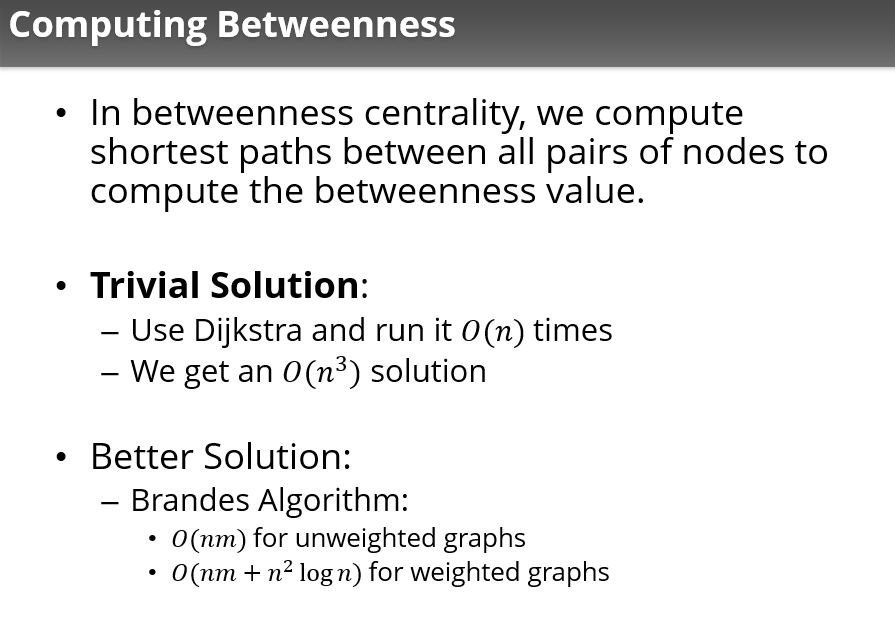

In [8]:
bc = nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None)
bc_df = pd.DataFrame(list(bc.items()),columns = ['Node_label','BC'])
G_df_outer3 = pd.merge(G_df_outer2, bc_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer3.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC,KC,PRC,BC
0,0,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876,0.000000
1,747,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876,0.000000
2,1,10,0.018797,0.294118,0.010,1.157940e-12,0.059733,0.009875,0.000319
3,4257,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076,0.000000
4,2194,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076,0.000000


### Centrality in terms of how fast you can reach others

**Closeness Centrality(cc)**

In closeness centrality, the intuition is that the more central nodes are, the
more quickly they can reach other nodes. Formally, these nodes should
have a smaller average shortest path length to other nodes. Path length calculated by minimum number of jumps needs to reach the target node. 

Suppose Vi is ith node in given graph for which we are interested in finding average shortest path length. Then from this node we will try to reach all other node by shortest path. Path length will be no. of jumps.

Let $l_i,_j$ represents the shortest path between $v_i$ and $v_j$ node. 

$μ_vᵢ$ is average shortest path length for $v_i$.

$μ_vᵢ = \frac{1}{n-1} \sum_{v_i\ne,v_j}l_i,_j$

This means we take path length between $v_i$ and $v_j$ where $v_i$ is fixed and $v_j$ is all other node of graph. Sum these path length and divide by (n-1).

$CC_{v_i,_j} = \frac{1}{μ_vᵢ}$ 
This means taking reciprocal of average path length.

In [9]:
cc = nx.closeness_centrality(G)
cc_df = pd.DataFrame(list(cc.items()),columns = ['Node_label','CC'])
G_df_outer4 = pd.merge(G_df_outer3, cc_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer4.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC,KC,PRC,BC,CC
0,0,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876,0.000000,0.001880
1,747,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876,0.000000,0.001880
2,1,10,0.018797,0.294118,0.010,1.157940e-12,0.059733,0.009875,0.000319,0.018797
3,4257,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076,0.000000,0.009893
4,2194,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076,0.000000,0.009893


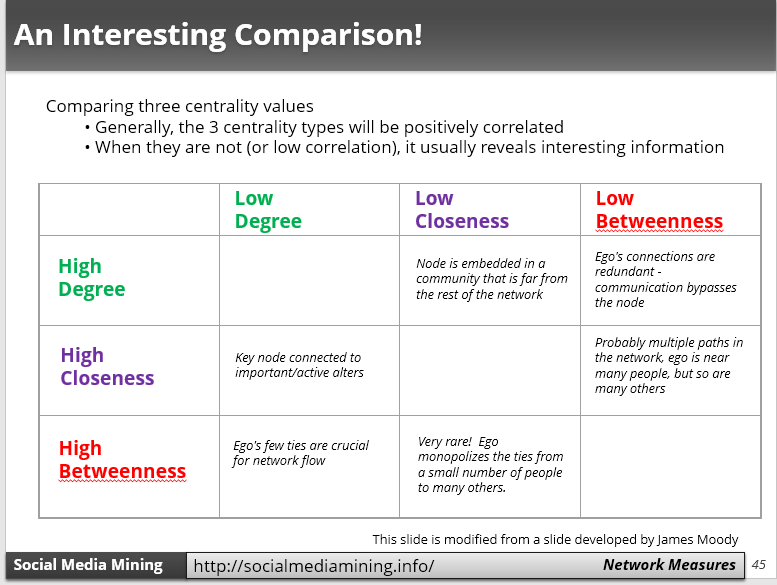

### Group Centrality

When we calculate centrality based on group of nodes. Let $𝐒$ represent group of node for which we would like to measure centrality. then $(𝑽 - 𝑺)$ represent nodes which are not part of the group. In this case we replace the group of node $𝐒$ as one node and redraw the graph with rest of the node. On this new graph we calculate centrality.

**Group Degree Centrality**

**Group Betweenness Centrality**

**Group Closeness Centrality**

## Reciprocity and Transitivity

Sometime have degree or centrality of node not able to clearly distinguish structural distinction these nodes have due to nearby relations. We can understand this by finding clustering coefficient of notes which measures the structural distinction between nodes.

In the social media we need to study the linking behaviour of network. Linking behaviour represent the edge formation behaviour. For this study Reciprocity and Transitivity is important feature.

**Reciprocity**

This is defined as when a has link with b has link with c then there will be link between a and c in directed graph. This can be represented using FOL as:

$(𝐑, {a𝐑b\space}  𝝠 {\space b𝐑c} ⟶ c𝐑a)$ : This mean when a has relation with b and b has relation with c then a and c will be related. In other term we can say friend of my friend is also friend of mine. In this case △ will be formed. 

As shown in the definition, a transitive behaviour needs at least three
edges. These three edges, along with the participating nodes, create a
triangle. Higher transitivity in a graph results in a denser graph, which
in turn is closer to a complete graph. Thus, we can determine how close
graphs are to the complete graph by measuring transitivity. This can be
performed by measuring the [global] clustering coefficient and local clustering
coefficient. The former is computed for the network, whereas the latter is
computed for a node.

**Global Clustering Coefficient(GCC) ** : This can help in quantifying graph reciprocity. This can be applied on undirected graph.

$GCC = \frac{(Number of Triangles) × 3}{Number of Connected Triples of Nodes}$. Connected triplets can be open loop where one of edge in triangle is missing. All 3 node is connected though two edges.

In this equation, a triple is an ordered set of three nodes, connected by
two (i.e., open triple) or three (closed triple) edges. Two triples are different
when:
1.  their nodes are different, 
2. their nodes are the same, but the triples are missing different edges.

This is called Global Clustering Coefficient which can be measured at graph level. But we can have local clustering coefficient which can be measured at node level.
[networkX Global Clustering library](https://networkx.org/documentation/networkx-1.2/reference/algorithms.clustering.html)

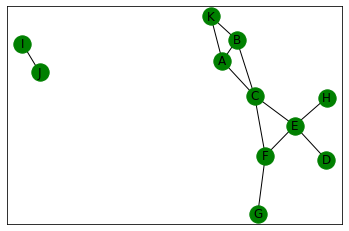

In [10]:
import networkx as nx
# To validate the global feature of graph smaller graph has been formed.
G1 = nx.Graph()

G1.add_edges_from([('A', 'B'), ('A', 'K'), ('B', 'K'), ('A', 'C'),
				('B', 'C'), ('C', 'F'), ('F', 'G'), ('C', 'E'),
				('E', 'F'), ('E', 'D'), ('E', 'H'), ('I', 'J')])

nx.draw_networkx(G1, with_labels = True, node_color ='green')


Additional feature of graph checked using [Python | Clustering, Connectivity and other Graph properties using Networkx](https://www.geeksforgeeks.org/python-clustering-connectivity-and-other-graph-properties-using-networkx/)

In [11]:
# # returns no. of trangle formed by each node.
# To find total no. of trangles: (Add all values of node)/3
nx.triangles(G1)
# Global Clustering coefficient of whole graph:
GCC = nx.transitivity(G1)

# Other interesting feature of graph:
# returns True or False whether Graph is connected
print(nx.is_connected(G1))

# returns number of different connected components
print(nx.number_connected_components(G1))

# returns list of nodes in different connected components
print(list(nx.connected_components(G1)))

# returns list of nodes of component containing given node
print(nx.node_connected_component(G1, 'I'))

# returns number of nodes to be removed
# so that Graph becomes disconnected
print(nx.node_connectivity(G1))

# returns number of edges to be removed
# so that Graph becomes disconnected
print(nx.edge_connectivity(G1))

False
2
[{'C', 'H', 'K', 'E', 'B', 'G', 'D', 'F', 'A'}, {'I', 'J'}]
{'I', 'J'}
0
0


In [12]:
GCC = nx.transitivity(G)
print(GCC)

0.002598152424942263


**Local Clustering Coefficient(LCC)**:
This is measured at node level. This is commonly used for undirected graphs. In this we see for given node $v_i$ how many neighbours it has.
Based on no. of neighbours we can find how many pairs formed between them.
Total no. of pair = $n𝐂_2$ where n = number of neighbours.
In these pairs we see how many are connected pairs. 
Then we can say $LCC = \frac{Number \space of Pairs \space of Neighbours \space of \space v_i \space That Are \space Connected}{Number \space of Pairs \space of Neighbours \space of \space v_i}$

In [13]:
# returns a Dictionary with clustering value of each node
lcc = nx.clustering(G)
lcc_df = pd.DataFrame(list(lcc.items()),columns = ['Node_label','LCC'])
G_df_outer5 = pd.merge(G_df_outer4, lcc_df, on='Node_label', how='outer') #here Node_label is common column
G_df_outer5.head()

,Node_label,Node_deg,norm_max_possible_deg,norm_max_deg,norm_deg_sum,EC,KC,PRC,BC,CC,LCC
0,0,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876,0.000000,0.001880,0.0
1,747,1,0.001880,0.029412,0.001,2.641422e-27,0.028374,0.001876,0.000000,0.001880,0.0
2,1,10,0.018797,0.294118,0.010,1.157940e-12,0.059733,0.009875,0.000319,0.018797,0.0
3,4257,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076,0.000000,0.009893,0.0
4,2194,1,0.001880,0.029412,0.001,3.661728e-13,0.031772,0.001076,0.000000,0.009893,0.0


In [14]:
# This returns clustering value of specified node
print(nx.clustering(G, '0'))

{}


**Reciprocity**: This is mutual relation between two node in the directed graph. suppose a --> b and also b -->a then we can say reciprocity exist between these two node. Informally reciprocity is "If you become my friend, I’ll be yours". 

The reciprocity of a directed graph is defined as the ratio of the number of edges pointing in both directions to the total number of edges in the graph.

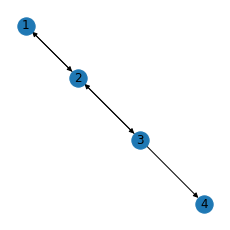

In [15]:
# Draw sample graph to check reciprocity
import networkx as nx
import matplotlib.pyplot as plt
GD1 = nx.DiGraph()
GD1.add_edges_from([(1,2),(2,3),(2,1),(3,2),(3,4)])
  
plt.figure(figsize =(3, 3))
nx.draw(GD1, with_labels=True)
plt.show()

In [16]:
nx.reciprocity(GD1, nodes=None)

0.8